In [1]:
import pandas as pd
import csv
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split



In [2]:
file_one = "Data/NYCAprilCrashes.csv" 

In [3]:
df = pd.read_csv(file_one, encoding="ISO-8859-1") 

In [4]:
df

,CrashDate,CrashTime,Borough,Latitude,Longitude,PersonsInjured,PersonsKilled,PedestriansInjured,PedestriansKilled,CyclistInjured,CyclistKilled,MotoristInjured,MotoristKilled,ContributingFactor,CollisionID,VehicleType
0,2020-04-01,17:45,MANHATTAN,40.7395,-73.9766,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,4305146,Ambulance
1,2020-04-01,18:30,QUEENS,40.7380,-73.8837,0,0,0,0,0,0,0,0,Backing Unsafely,4307234,Sedan
2,2020-04-01,12:50,STATEN ISLAND,40.5834,-74.0898,1,0,0,0,0,0,1,0,Driver Inattention/Distraction,4305083,Sedan
3,2020-04-01,14:40,BROOKLYN,40.6422,-73.9163,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,4307827,Station Wagon/Sport Utility Vehicle
4,2020-04-01,16:40,BROOKLYN,40.7081,-73.9650,0,0,0,0,0,0,0,0,Passing Too Closely,4305095,Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,2020-04-30,13:10,BROOKLYN,40.6239,-73.9355,0,0,0,0,0,0,0,0,Following Too Closely,4311167,Station Wagon/Sport Utility Vehicle
2514,2020-04-30,6:29,MANHATTAN,40.7935,-73.9373,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,4311688,Taxi
2515,2020-04-30,16:00,BROOKLYN,40.6696,-73.9197,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,4311361,Station Wagon/Sport Utility Vehicle
2516,2020-04-30,18:00,MANHATTAN,40.7177,-73.9799,0,0,0,0,0,0,0,0,Unspecified,4311121,Sedan


In [5]:
new_data = df.dropna(axis = 0, how ='any') 


In [6]:
new_data['CrashTime'] =  pd.to_datetime(new_data['CrashTime'], format='%H:%M')


<ipython-input-6-8474a275f6b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['CrashTime'] =  pd.to_datetime(new_data['CrashTime'], format='%H:%M')


In [7]:
new_data.dtypes

CrashDate                     object
CrashTime             datetime64[ns]
Borough                       object
Latitude                     float64
Longitude                    float64
PersonsInjured                 int64
PersonsKilled                  int64
PedestriansInjured             int64
PedestriansKilled              int64
CyclistInjured                 int64
CyclistKilled                  int64
MotoristInjured                int64
MotoristKilled                 int64
ContributingFactor            object
CollisionID                    int64
VehicleType                   object
dtype: object

In [8]:
new_data

,CrashDate,CrashTime,Borough,Latitude,Longitude,PersonsInjured,PersonsKilled,PedestriansInjured,PedestriansKilled,CyclistInjured,CyclistKilled,MotoristInjured,MotoristKilled,ContributingFactor,CollisionID,VehicleType
0,2020-04-01,1900-01-01 17:45:00,MANHATTAN,40.7395,-73.9766,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,4305146,Ambulance
1,2020-04-01,1900-01-01 18:30:00,QUEENS,40.7380,-73.8837,0,0,0,0,0,0,0,0,Backing Unsafely,4307234,Sedan
2,2020-04-01,1900-01-01 12:50:00,STATEN ISLAND,40.5834,-74.0898,1,0,0,0,0,0,1,0,Driver Inattention/Distraction,4305083,Sedan
3,2020-04-01,1900-01-01 14:40:00,BROOKLYN,40.6422,-73.9163,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,4307827,Station Wagon/Sport Utility Vehicle
4,2020-04-01,1900-01-01 16:40:00,BROOKLYN,40.7081,-73.9650,0,0,0,0,0,0,0,0,Passing Too Closely,4305095,Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,2020-04-30,1900-01-01 13:10:00,BROOKLYN,40.6239,-73.9355,0,0,0,0,0,0,0,0,Following Too Closely,4311167,Station Wagon/Sport Utility Vehicle
2514,2020-04-30,1900-01-01 06:29:00,MANHATTAN,40.7935,-73.9373,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,4311688,Taxi
2515,2020-04-30,1900-01-01 16:00:00,BROOKLYN,40.6696,-73.9197,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,4311361,Station Wagon/Sport Utility Vehicle
2516,2020-04-30,1900-01-01 18:00:00,MANHATTAN,40.7177,-73.9799,0,0,0,0,0,0,0,0,Unspecified,4311121,Sedan


In [9]:
new_data['Hour']=pd.to_datetime(new_data['CrashTime'], format='%H:%M').dt.hour

<ipython-input-9-39fbd249da61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Hour']=pd.to_datetime(new_data['CrashTime'], format='%H:%M').dt.hour


In [10]:
new_data

,CrashDate,CrashTime,Borough,Latitude,Longitude,PersonsInjured,PersonsKilled,PedestriansInjured,PedestriansKilled,CyclistInjured,CyclistKilled,MotoristInjured,MotoristKilled,ContributingFactor,CollisionID,VehicleType,Hour
0,2020-04-01,1900-01-01 17:45:00,MANHATTAN,40.7395,-73.9766,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,4305146,Ambulance,17
1,2020-04-01,1900-01-01 18:30:00,QUEENS,40.7380,-73.8837,0,0,0,0,0,0,0,0,Backing Unsafely,4307234,Sedan,18
2,2020-04-01,1900-01-01 12:50:00,STATEN ISLAND,40.5834,-74.0898,1,0,0,0,0,0,1,0,Driver Inattention/Distraction,4305083,Sedan,12
3,2020-04-01,1900-01-01 14:40:00,BROOKLYN,40.6422,-73.9163,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,4307827,Station Wagon/Sport Utility Vehicle,14
4,2020-04-01,1900-01-01 16:40:00,BROOKLYN,40.7081,-73.9650,0,0,0,0,0,0,0,0,Passing Too Closely,4305095,Sedan,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,2020-04-30,1900-01-01 13:10:00,BROOKLYN,40.6239,-73.9355,0,0,0,0,0,0,0,0,Following Too Closely,4311167,Station Wagon/Sport Utility Vehicle,13
2514,2020-04-30,1900-01-01 06:29:00,MANHATTAN,40.7935,-73.9373,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,4311688,Taxi,6
2515,2020-04-30,1900-01-01 16:00:00,BROOKLYN,40.6696,-73.9197,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,4311361,Station Wagon/Sport Utility Vehicle,16
2516,2020-04-30,1900-01-01 18:00:00,MANHATTAN,40.7177,-73.9799,0,0,0,0,0,0,0,0,Unspecified,4311121,Sedan,18


In [11]:
hour_data = new_data.groupby(by=["Hour"]).sum()
hour_df = hour_data.reset_index()

In [12]:
hour_df

,Hour,Latitude,Longitude,PersonsInjured,PersonsKilled,PedestriansInjured,PedestriansKilled,CyclistInjured,CyclistKilled,MotoristInjured,MotoristKilled,CollisionID
0,0,3909.3844,-7094.2755,28,0,3,0,1,0,24,0,413658949
1,1,2035.9666,-3694.4875,7,1,0,0,0,0,7,1,215524478
2,2,1791.5796,-3252.2545,11,0,0,0,0,0,11,0,189623471
3,3,1181.5950,-2142.8267,3,0,1,0,0,0,2,0,124998413
4,4,570.0016,-1035.0708,1,0,0,0,0,0,1,0,60321054
5,5,1425.0417,-2587.4107,7,0,2,0,1,0,4,0,150819276
6,6,2280.9020,-4138.6867,21,0,3,0,4,0,14,0,241310018
7,7,2648.6380,-4803.7425,19,0,2,0,2,0,15,0,280132030
8,8,3584.7247,-6503.9259,21,0,3,0,1,0,17,0,379231811
9,9,2891.8763,-5246.5139,19,0,3,0,0,0,16,0,305972861


# Linear Regression


### Persons Injured By Hour

In [13]:
hourly_X = hour_df["Hour"].values.reshape(-1, 1)
hourly_y = hour_df["PersonsInjured"].values.reshape(-1, 1)

print("Shape: ", hourly_X.shape, hourly_y.shape)

Shape:  (24, 1) (24, 1)


Text(0, 0.5, 'Persons Injured')

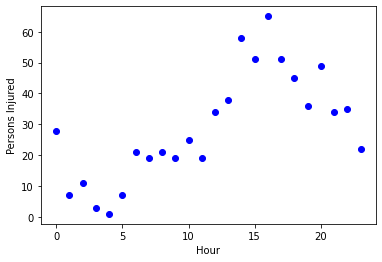

In [14]:
 # Plot the data to see if a linear trend exists

### BEGIN SOLUTION
fig3 = plt.scatter(hourly_X, hourly_y, color="blue")
plt.xlabel("Hour")
plt.ylabel("Persons Injured")

### END SOLUTION

In [15]:
fig3.figure.savefig("Images/scatter-lr.png")

In [16]:
# Create the model and fit the model to the data


### BEGIN SOLUTION

hourly_model = LinearRegression()

### END SOLUTION

In [17]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.

### BEGIN SOLUTION

hourly_model.fit(hourly_X, hourly_y)

### END SOLUTION

LinearRegression()

In [18]:
# Print the coefficient and the intercept for the model

### BEGIN SOLUTION
print('Weight coefficients: ', hourly_model.coef_)
print('y-axis intercept: ', hourly_model.intercept_)
### END SOLUTION

Weight coefficients:  [[1.69173913]]
y-axis intercept:  [9.67]


In [19]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

hourly_x_min = np.array([[hourly_X.min()]])
hourly_x_max = np.array([[hourly_X.max()]])
print(f"Min X Value: {hourly_x_min}")
print(f"Max X Value: {hourly_x_max}")

Min X Value: [[0]]
Max X Value: [[23]]


In [20]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

### BEGIN SOLUTION
hourly_y_min = hourly_model.predict(hourly_x_min)
hourly_y_max = hourly_model.predict(hourly_x_max)
### END SOLUTION

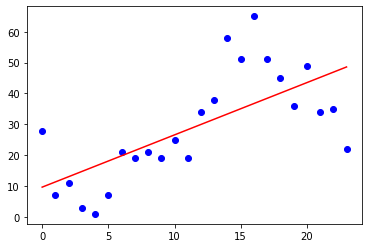

In [21]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

### BEGIN SOLUTION
fig4=plt.scatter(hourly_X, hourly_y, c='blue')
plt.plot([hourly_x_min[0], hourly_x_max[0]], [hourly_y_min[0], hourly_y_max[0]], c='red')
### END SOLUTION

In [22]:
fig4.figure.savefig("Images/scatter-lr2.png")

In [23]:
hourly_model.score(hourly_X, hourly_y)

0.45569006812078283

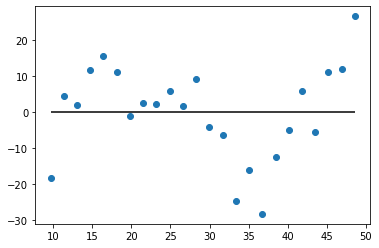

In [24]:
hourly_predictions = hourly_model.predict(hourly_X)
# Hourly Residual Plot 
plt.scatter(hourly_predictions, hourly_predictions - hourly_y)
plt.hlines(y=0, xmin=hourly_predictions.min(), xmax=hourly_predictions.max())
plt.show()

## Quantifying Our Model

In [25]:
# Use our model to predict a value
hourly_predicted = hourly_model.predict(hourly_X)

# Score the prediction with mse and r2
hourly_mse = mean_squared_error(hourly_y, hourly_predicted)
hourly_r2 = r2_score(hourly_y, hourly_predicted)

print(f"Mean Squared Error (MSE): {hourly_mse}")
print(f"R-squared (R2 ): {hourly_r2}")

Mean Squared Error (MSE): 163.8061050724638
R-squared (R2 ): 0.45569006812078283


In [26]:
 # Overall Score for the model
hourly_model.score(hourly_X, hourly_y)

0.45569006812078283

# Correlation Matrix

In [27]:
new_data
#del new_data['time']

,CrashDate,CrashTime,Borough,Latitude,Longitude,PersonsInjured,PersonsKilled,PedestriansInjured,PedestriansKilled,CyclistInjured,CyclistKilled,MotoristInjured,MotoristKilled,ContributingFactor,CollisionID,VehicleType,Hour
0,2020-04-01,1900-01-01 17:45:00,MANHATTAN,40.7395,-73.9766,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,4305146,Ambulance,17
1,2020-04-01,1900-01-01 18:30:00,QUEENS,40.7380,-73.8837,0,0,0,0,0,0,0,0,Backing Unsafely,4307234,Sedan,18
2,2020-04-01,1900-01-01 12:50:00,STATEN ISLAND,40.5834,-74.0898,1,0,0,0,0,0,1,0,Driver Inattention/Distraction,4305083,Sedan,12
3,2020-04-01,1900-01-01 14:40:00,BROOKLYN,40.6422,-73.9163,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,4307827,Station Wagon/Sport Utility Vehicle,14
4,2020-04-01,1900-01-01 16:40:00,BROOKLYN,40.7081,-73.9650,0,0,0,0,0,0,0,0,Passing Too Closely,4305095,Sedan,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,2020-04-30,1900-01-01 13:10:00,BROOKLYN,40.6239,-73.9355,0,0,0,0,0,0,0,0,Following Too Closely,4311167,Station Wagon/Sport Utility Vehicle,13
2514,2020-04-30,1900-01-01 06:29:00,MANHATTAN,40.7935,-73.9373,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,4311688,Taxi,6
2515,2020-04-30,1900-01-01 16:00:00,BROOKLYN,40.6696,-73.9197,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,4311361,Station Wagon/Sport Utility Vehicle,16
2516,2020-04-30,1900-01-01 18:00:00,MANHATTAN,40.7177,-73.9799,0,0,0,0,0,0,0,0,Unspecified,4311121,Sedan,18


In [28]:
corrMatrix_new = new_data.corr()
print (corrMatrix_new)

                    Latitude  Longitude  PersonsInjured  PersonsKilled  \
Latitude            1.000000  -0.991083        0.007740      -0.004579   
Longitude          -0.991083   1.000000       -0.010892      -0.002750   
PersonsInjured      0.007740  -0.010892        1.000000       0.030888   
PersonsKilled      -0.004579  -0.002750        0.030888       1.000000   
PedestriansInjured  0.004935  -0.005685        0.242906      -0.007901   
PedestriansKilled        NaN        NaN             NaN            NaN   
CyclistInjured      0.005723  -0.007240        0.251034      -0.007739   
CyclistKilled      -0.001579  -0.000970       -0.009233       0.499699   
MotoristInjured     0.004628  -0.007211        0.897317       0.038170   
MotoristKilled     -0.004375  -0.002614        0.040992       0.865851   
CollisionID        -0.009571   0.007598       -0.006355       0.005756   
Hour               -0.024028   0.016800        0.057749       0.006523   

                    PedestriansInjure

In [29]:
import matplotlib.pyplot as plt


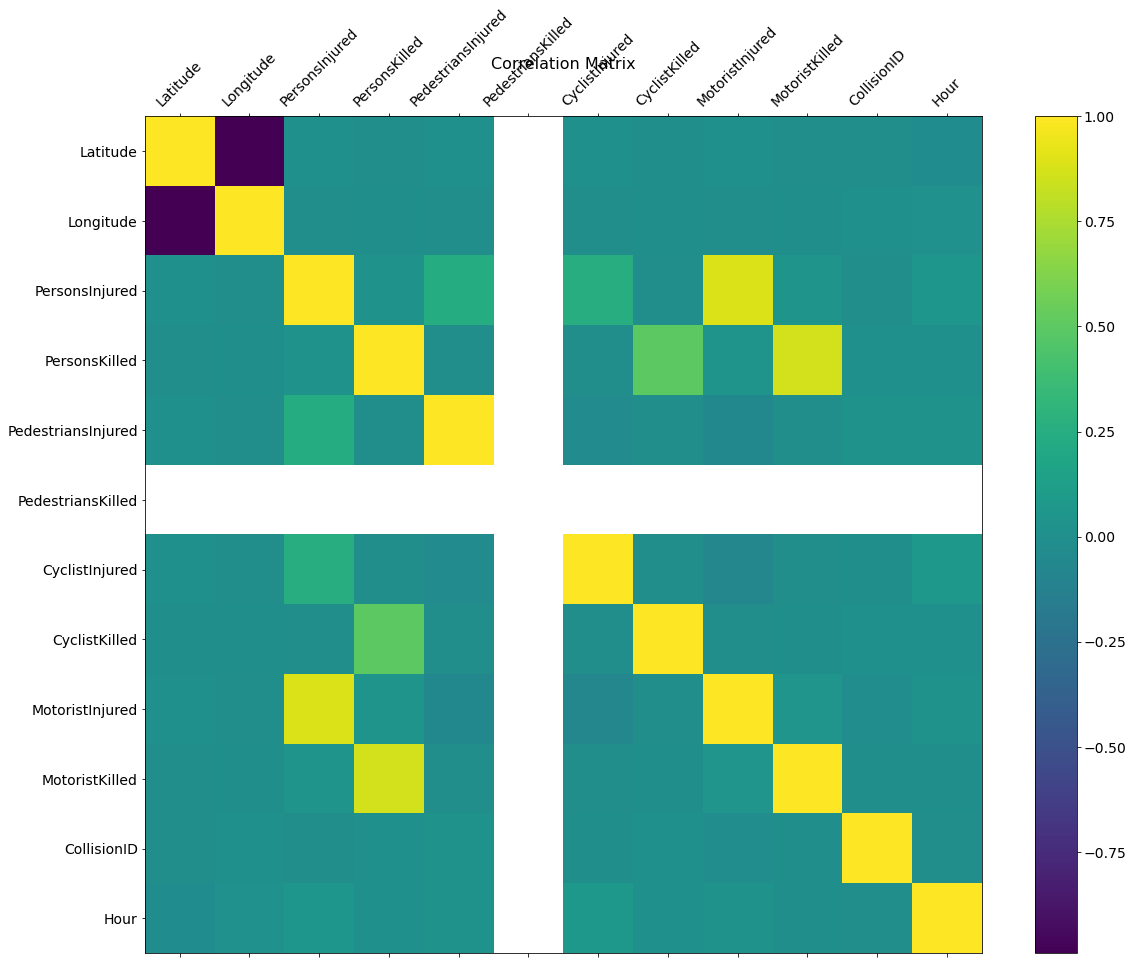

In [30]:
f = plt.figure(figsize=(19, 15))
plt.matshow(new_data.corr(), fignum=f.number)
plt.xticks(range(new_data.select_dtypes(['number']).shape[1]), new_data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(new_data.select_dtypes(['number']).shape[1]), new_data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.savefig('Images/corr.png')



# KNN

In [31]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn_data = new_data.drop("CrashDate", axis=1)
knn_data1 = knn_data.drop("CrashTime", axis=1)

In [33]:
knn_data2 = knn_data1.replace(["BRONX", "BROOKLYN", "MANHATTAN", "QUEENS", "STATEN ISLAND"], [1,2,3,4,5])

In [34]:
#del knn_data2["ContributingFactor"]
#del knn_data2["VehicleType"]
del knn_data2["CollisionID"]

In [35]:
knn_data2

,Borough,Latitude,Longitude,PersonsInjured,PersonsKilled,PedestriansInjured,PedestriansKilled,CyclistInjured,CyclistKilled,MotoristInjured,MotoristKilled,ContributingFactor,VehicleType,Hour
0,3,40.7395,-73.9766,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Ambulance,17
1,4,40.7380,-73.8837,0,0,0,0,0,0,0,0,Backing Unsafely,Sedan,18
2,5,40.5834,-74.0898,1,0,0,0,0,0,1,0,Driver Inattention/Distraction,Sedan,12
3,2,40.6422,-73.9163,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Station Wagon/Sport Utility Vehicle,14
4,2,40.7081,-73.9650,0,0,0,0,0,0,0,0,Passing Too Closely,Sedan,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,2,40.6239,-73.9355,0,0,0,0,0,0,0,0,Following Too Closely,Station Wagon/Sport Utility Vehicle,13
2514,3,40.7935,-73.9373,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Taxi,6
2515,2,40.6696,-73.9197,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Station Wagon/Sport Utility Vehicle,16
2516,3,40.7177,-73.9799,0,0,0,0,0,0,0,0,Unspecified,Sedan,18


In [36]:
borough_y = knn_data2["Borough"]
target_names = ["BRONX", "BROOKLYN", "MANHATTAN", "QUEENS", "STATEN ISLAND"]

In [37]:
borough_X = knn_data2[["Latitude", "Longitude"]]
borough_X

,Latitude,Longitude
0,40.7395,-73.9766
1,40.7380,-73.8837
2,40.5834,-74.0898
3,40.6422,-73.9163
4,40.7081,-73.9650
...,...,...
2513,40.6239,-73.9355
2514,40.7935,-73.9373
2515,40.6696,-73.9197
2516,40.7177,-73.9799


In [38]:
from sklearn.model_selection import train_test_split
borough_X_train, borough_X_test, borough_y_train, borough_y_test = train_test_split(
    borough_X, borough_y, random_state=42)


In [39]:
 from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

borough_X_scaler = StandardScaler().fit(borough_X_train)

In [40]:
# Transform the training and testing data using the X_scaler and y_scaler models

borough_X_train_scaled = borough_X_scaler.transform(borough_X_train)
borough_X_test_scaled = borough_X_scaler.transform(borough_X_test)

k: 1, Train/Test Score: 1.000/0.997
k: 3, Train/Test Score: 0.998/0.997
k: 5, Train/Test Score: 0.996/0.995
k: 7, Train/Test Score: 0.996/0.994
k: 9, Train/Test Score: 0.996/0.994
k: 11, Train/Test Score: 0.995/0.992
k: 13, Train/Test Score: 0.993/0.994
k: 15, Train/Test Score: 0.993/0.992
k: 17, Train/Test Score: 0.992/0.990
k: 19, Train/Test Score: 0.994/0.989


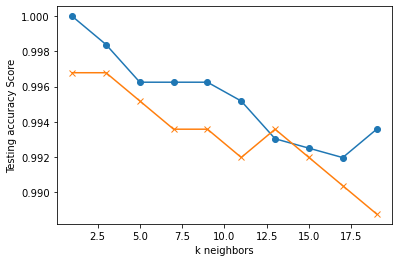

In [41]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
borough_train_scores = []
borough_test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(borough_X_train_scaled, borough_y_train)
    borough_train_score = knn.score(borough_X_train_scaled, borough_y_train)
    borough_test_score = knn.score(borough_X_test_scaled, borough_y_test)
    borough_train_scores.append(borough_train_score)
    borough_test_scores.append(borough_test_score)
    print(f"k: {k}, Train/Test Score: {borough_train_score:.3f}/{borough_test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), borough_train_scores, marker='o')
plt.plot(range(1, 20, 2), borough_test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig('Images/knn.png')
plt.show()

In [42]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(borough_X_train_scaled, borough_y_train)
print('k=13 Test Acc: %.3f' % knn.score(borough_X_test_scaled, borough_y_test))

k=13 Test Acc: 0.994


# KNN - Cyclist Injury by Borough

In [43]:
cyclist_knn = knn_data2

In [44]:
cyclist_knn

,Borough,Latitude,Longitude,PersonsInjured,PersonsKilled,PedestriansInjured,PedestriansKilled,CyclistInjured,CyclistKilled,MotoristInjured,MotoristKilled,ContributingFactor,VehicleType,Hour
0,3,40.7395,-73.9766,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Ambulance,17
1,4,40.7380,-73.8837,0,0,0,0,0,0,0,0,Backing Unsafely,Sedan,18
2,5,40.5834,-74.0898,1,0,0,0,0,0,1,0,Driver Inattention/Distraction,Sedan,12
3,2,40.6422,-73.9163,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Station Wagon/Sport Utility Vehicle,14
4,2,40.7081,-73.9650,0,0,0,0,0,0,0,0,Passing Too Closely,Sedan,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,2,40.6239,-73.9355,0,0,0,0,0,0,0,0,Following Too Closely,Station Wagon/Sport Utility Vehicle,13
2514,3,40.7935,-73.9373,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Taxi,6
2515,2,40.6696,-73.9197,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Station Wagon/Sport Utility Vehicle,16
2516,3,40.7177,-73.9799,0,0,0,0,0,0,0,0,Unspecified,Sedan,18


In [45]:
knn6_y = cyclist_knn["Borough"]
knn6_target_names = ["BRONX", "BROOKLYN", "MANHATTAN", "QUEENS", "STATEN ISLAND"]

In [46]:
knn6_X = cyclist_knn[["CyclistInjured", "CyclistKilled"]]
knn6_X

,CyclistInjured,CyclistKilled
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2513,0,0
2514,0,0
2515,0,0
2516,0,0


In [47]:
from sklearn.model_selection import train_test_split
knn6_X_train, knn6_X_test, knn6_y_train, knn6_y_test = train_test_split(
    knn6_X, knn6_y, random_state=42)



In [48]:
 from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

knn6_X_scaler = StandardScaler().fit(knn6_X_train)

In [49]:
# Transform the training and testing data using the X_scaler and y_scaler models

knn6_X_train_scaled = knn6_X_scaler.transform(knn6_X_train)
knn6_X_test_scaled = knn6_X_scaler.transform(knn6_X_test)

k: 1, Train/Test Score: 0.344/0.390
k: 3, Train/Test Score: 0.237/0.222
k: 5, Train/Test Score: 0.230/0.207
k: 7, Train/Test Score: 0.230/0.207
k: 9, Train/Test Score: 0.229/0.205
k: 11, Train/Test Score: 0.229/0.205
k: 13, Train/Test Score: 0.229/0.205
k: 15, Train/Test Score: 0.236/0.220
k: 17, Train/Test Score: 0.236/0.220
k: 19, Train/Test Score: 0.236/0.220


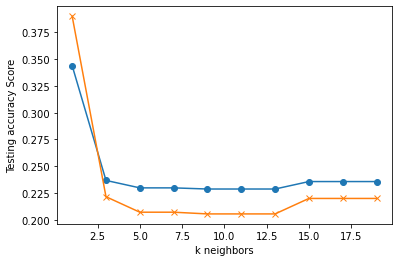

In [50]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
knn6_train_scores = []
knn6_test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(knn6_X_train_scaled, knn6_y_train)
    knn6_train_score = knn.score(knn6_X_train_scaled, knn6_y_train)
    knn6_test_score = knn.score(knn6_X_test_scaled, knn6_y_test)
    knn6_train_scores.append(knn6_train_score)
    knn6_test_scores.append(knn6_test_score)
    print(f"k: {k}, Train/Test Score: {knn6_train_score:.3f}/{knn6_test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), knn6_train_scores, marker='o')
plt.plot(range(1, 20, 2), knn6_test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig('Images/cyclistknn.png')
plt.show()

In [51]:
cyclistknn = KNeighborsClassifier(n_neighbors=15)
cyclistknn.fit(knn6_X_train_scaled, knn6_y_train)
print('k=15 Test Acc: %.3f' % cyclistknn.score(knn6_X_test_scaled, knn6_y_test))

k=15 Test Acc: 0.220


With an accuracy of 22%, we can predict the borough that is most likely to be dangerous for Cyclists.

# KNN - Pedestrian Injury by Borough

In [52]:
pedestrian_knn = knn_data2

In [53]:
pedestrian_knn

,Borough,Latitude,Longitude,PersonsInjured,PersonsKilled,PedestriansInjured,PedestriansKilled,CyclistInjured,CyclistKilled,MotoristInjured,MotoristKilled,ContributingFactor,VehicleType,Hour
0,3,40.7395,-73.9766,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Ambulance,17
1,4,40.7380,-73.8837,0,0,0,0,0,0,0,0,Backing Unsafely,Sedan,18
2,5,40.5834,-74.0898,1,0,0,0,0,0,1,0,Driver Inattention/Distraction,Sedan,12
3,2,40.6422,-73.9163,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Station Wagon/Sport Utility Vehicle,14
4,2,40.7081,-73.9650,0,0,0,0,0,0,0,0,Passing Too Closely,Sedan,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,2,40.6239,-73.9355,0,0,0,0,0,0,0,0,Following Too Closely,Station Wagon/Sport Utility Vehicle,13
2514,3,40.7935,-73.9373,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Taxi,6
2515,2,40.6696,-73.9197,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Station Wagon/Sport Utility Vehicle,16
2516,3,40.7177,-73.9799,0,0,0,0,0,0,0,0,Unspecified,Sedan,18


In [54]:
pedestrian_y = pedestrian_knn["Borough"]
pedestrian_target_names = ["BRONX", "BROOKLYN", "MANHATTAN", "QUEENS", "STATEN ISLAND"]

In [55]:
pedestrian_X = pedestrian_knn[["PedestriansInjured", "PedestriansKilled"]]
pedestrian_X

,PedestriansInjured,PedestriansKilled
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2513,0,0
2514,0,0
2515,0,0
2516,0,0


In [56]:
from sklearn.model_selection import train_test_split
pedestrian_X_train, pedestrian_X_test, pedestrian_y_train, pedestrian_y_test = train_test_split(
    pedestrian_X, pedestrian_y, random_state=42)




In [57]:
 from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

pedestrian_X_scaler = StandardScaler().fit(pedestrian_X_train)

In [58]:
# Transform the training and testing data using the X_scaler and y_scaler models

pedestrian_X_train_scaled = pedestrian_X_scaler.transform(pedestrian_X_train)
pedestrian_X_test_scaled = pedestrian_X_scaler.transform(pedestrian_X_test)

k: 1, Train/Test Score: 0.224/0.207
k: 3, Train/Test Score: 0.279/0.260
k: 5, Train/Test Score: 0.286/0.268
k: 7, Train/Test Score: 0.283/0.258
k: 9, Train/Test Score: 0.286/0.268
k: 11, Train/Test Score: 0.286/0.268
k: 13, Train/Test Score: 0.279/0.260
k: 15, Train/Test Score: 0.286/0.268
k: 17, Train/Test Score: 0.286/0.268
k: 19, Train/Test Score: 0.286/0.268


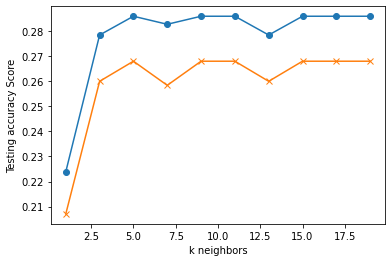

In [59]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
pedestrian_train_scores = []
pedestrian_test_scores = []
for k in range(1, 20, 2):
    pedestrianknn = KNeighborsClassifier(n_neighbors=k)
    pedestrianknn.fit(pedestrian_X_train_scaled, pedestrian_y_train)
    pedestrian_train_score = pedestrianknn.score(pedestrian_X_train_scaled, pedestrian_y_train)
    pedestrian_test_score = pedestrianknn.score(pedestrian_X_test_scaled, pedestrian_y_test)
    pedestrian_train_scores.append(pedestrian_train_score)
    pedestrian_test_scores.append(pedestrian_test_score)
    print(f"k: {k}, Train/Test Score: {pedestrian_train_score:.3f}/{pedestrian_test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), pedestrian_train_scores, marker='o')
plt.plot(range(1, 20, 2), pedestrian_test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig('Images/pedestrianknn.png')
plt.show()

In [60]:
pedestrianknn = KNeighborsClassifier(n_neighbors=9)
pedestrianknn.fit(pedestrian_X_train_scaled, pedestrian_y_train)
print('k=9 Test Acc: %.3f' % pedestrianknn.score(pedestrian_X_test_scaled, pedestrian_y_test))

k=9 Test Acc: 0.268


With an accuracy of 27%, we can predict the most dangerous borough for Pedestrians.

# KNN - Motorist Injury By Borough

In [61]:
motorist_knn = knn_data2

In [62]:
motorist_y = motorist_knn["Borough"]
motorist_target_names = ["BRONX", "BROOKLYN", "MANHATTAN", "QUEENS", "STATEN ISLAND"]

In [63]:
motorist_X = motorist_knn[["MotoristInjured", "MotoristKilled"]]
motorist_X

,MotoristInjured,MotoristKilled
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
2513,0,0
2514,0,0
2515,0,0
2516,0,0


In [64]:
from sklearn.model_selection import train_test_split
motorist_X_train, motorist_X_test, motorist_y_train, motorist_y_test = train_test_split(
    motorist_X, motorist_y, random_state=42)





In [65]:
 from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

motorist_X_scaler = StandardScaler().fit(motorist_X_train)

In [66]:
# Transform the training and testing data using the X_scaler and y_scaler models

motorist_X_train_scaled = motorist_X_scaler.transform(motorist_X_train)
motorist_X_test_scaled = motorist_X_scaler.transform(motorist_X_test)

k: 1, Train/Test Score: 0.149/0.133
k: 3, Train/Test Score: 0.150/0.141
k: 5, Train/Test Score: 0.149/0.141
k: 7, Train/Test Score: 0.297/0.281
k: 9, Train/Test Score: 0.131/0.120
k: 11, Train/Test Score: 0.282/0.270
k: 13, Train/Test Score: 0.282/0.270
k: 15, Train/Test Score: 0.282/0.270
k: 17, Train/Test Score: 0.132/0.125
k: 19, Train/Test Score: 0.299/0.286


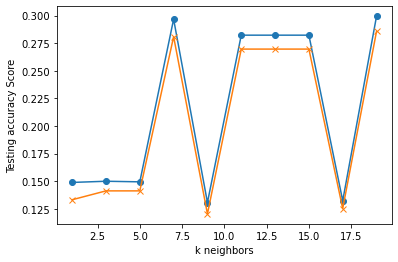

In [67]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
motorist_train_scores = []
motorist_test_scores = []
for k in range(1, 20, 2):
    motoristknn = KNeighborsClassifier(n_neighbors=k)
    motoristknn.fit(motorist_X_train_scaled, motorist_y_train)
    motorist_train_score = motoristknn.score(motorist_X_train_scaled, motorist_y_train)
    motorist_test_score = motoristknn.score(motorist_X_test_scaled, motorist_y_test)
    motorist_train_scores.append(motorist_train_score)
    motorist_test_scores.append(motorist_test_score)
    print(f"k: {k}, Train/Test Score: {motorist_train_score:.3f}/{motorist_test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), motorist_train_scores, marker='o')
plt.plot(range(1, 20, 2), motorist_test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig('Images/motoristknn.png')
plt.show()

In [68]:
motoristknn = KNeighborsClassifier(n_neighbors=19)
motoristknn.fit(pedestrian_X_train_scaled, pedestrian_y_train)
print('k=19 Test Acc: %.3f' % motoristknn.score(motorist_X_test_scaled, motorist_y_test))

k=19 Test Acc: 0.271


With 27% accuracy, we can predict the most dangerous borough for motorist. 

# KNN - Persons Injured by Borough

In [69]:
person_knn = knn_data2

In [70]:
person_y = person_knn["Borough"]
person_target_names = ["BRONX", "BROOKLYN", "MANHATTAN", "QUEENS", "STATEN ISLAND"]

In [71]:
person_X = person_knn[["PersonsInjured", "PersonsKilled"]]
person_X

,PersonsInjured,PersonsKilled
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
2513,0,0
2514,0,0
2515,0,0
2516,0,0


In [72]:
from sklearn.model_selection import train_test_split
person_X_train, person_X_test, person_y_train, person_y_test = train_test_split(
    person_X, person_y, random_state=42)






In [73]:
 from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

person_X_scaler = StandardScaler().fit(person_X_train)

In [74]:
# Transform the training and testing data using the X_scaler and y_scaler models

person_X_train_scaled = person_X_scaler.transform(person_X_train)
person_X_test_scaled = person_X_scaler.transform(person_X_test)

k: 1, Train/Test Score: 0.254/0.250
k: 3, Train/Test Score: 0.270/0.266
k: 5, Train/Test Score: 0.260/0.247
k: 7, Train/Test Score: 0.271/0.268
k: 9, Train/Test Score: 0.277/0.262
k: 11, Train/Test Score: 0.281/0.266
k: 13, Train/Test Score: 0.280/0.265
k: 15, Train/Test Score: 0.280/0.265
k: 17, Train/Test Score: 0.280/0.266
k: 19, Train/Test Score: 0.239/0.215


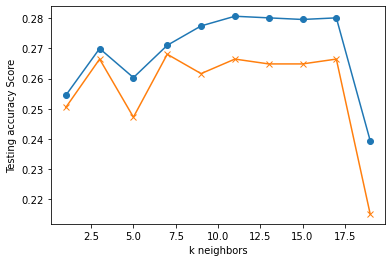

In [75]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
person_train_scores = []
person_test_scores = []
for k in range(1, 20, 2):
    personknn = KNeighborsClassifier(n_neighbors=k)
    personknn.fit(person_X_train_scaled, person_y_train)
    person_train_score = personknn.score(person_X_train_scaled, person_y_train)
    person_test_score = personknn.score(person_X_test_scaled, person_y_test)
    person_train_scores.append(person_train_score)
    person_test_scores.append(person_test_score)
    print(f"k: {k}, Train/Test Score: {person_train_score:.3f}/{person_test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), person_train_scores, marker='o')
plt.plot(range(1, 20, 2), person_test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig('Images/personknn.png')
plt.show()

In [76]:
personknn = KNeighborsClassifier(n_neighbors=17)
personknn.fit(person_X_train_scaled, person_y_train)
print('k=17 Test Acc: %.3f' % personknn.score(person_X_test_scaled, person_y_test))

k=17 Test Acc: 0.266


With 26% accuracy, we can classify the borough most likely to have an injury.

# KNN INJURY by Borough

In [77]:
all_knn = knn_data2

In [78]:
all_y = person_knn["Borough"]
all_target_names = ["BRONX", "BROOKLYN", "MANHATTAN", "QUEENS", "STATEN ISLAND"]

In [79]:
all_X = all_knn[["PersonsInjured", "PersonsKilled", "Hour", "PedestriansInjured", "PedestriansKilled", "MotoristInjured", "MotoristKilled", "CyclistInjured", "CyclistKilled"]]
all_X

,PersonsInjured,PersonsKilled,Hour,PedestriansInjured,PedestriansKilled,MotoristInjured,MotoristKilled,CyclistInjured,CyclistKilled
0,0,0,17,0,0,0,0,0,0
1,0,0,18,0,0,0,0,0,0
2,1,0,12,0,0,1,0,0,0
3,0,0,14,0,0,0,0,0,0
4,0,0,16,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2513,0,0,13,0,0,0,0,0,0
2514,0,0,6,0,0,0,0,0,0
2515,0,0,16,0,0,0,0,0,0
2516,0,0,18,0,0,0,0,0,0


In [80]:
from sklearn.model_selection import train_test_split
all_X_train, all_X_test, all_y_train, all_y_test = train_test_split(
    all_X, person_y, random_state=42)


In [81]:
 from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

all_X_scaler = StandardScaler().fit(all_X_train)

In [82]:
# Transform the training and testing data using the X_scaler and y_scaler models

all_X_train_scaled = all_X_scaler.transform(all_X_train)
all_X_test_scaled = all_X_scaler.transform(all_X_test)

k: 1, Train/Test Score: 0.287/0.242
k: 3, Train/Test Score: 0.282/0.252
k: 5, Train/Test Score: 0.319/0.273
k: 7, Train/Test Score: 0.328/0.295
k: 9, Train/Test Score: 0.318/0.299
k: 11, Train/Test Score: 0.336/0.332
k: 13, Train/Test Score: 0.335/0.337
k: 15, Train/Test Score: 0.343/0.345
k: 17, Train/Test Score: 0.340/0.345
k: 19, Train/Test Score: 0.344/0.347


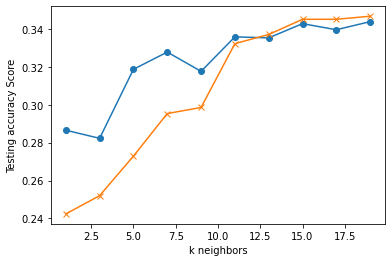

In [83]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
all_train_scores = []
all_test_scores = []
for k in range(1, 20, 2):
    allknn = KNeighborsClassifier(n_neighbors=k)
    allknn.fit(all_X_train_scaled, all_y_train)
    all_train_score = allknn.score(all_X_train_scaled, all_y_train)
    all_test_score = allknn.score(all_X_test_scaled, all_y_test)
    all_train_scores.append(all_train_score)
    all_test_scores.append(all_test_score)
    print(f"k: {k}, Train/Test Score: {all_train_score:.3f}/{all_test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), all_train_scores, marker='o')
plt.plot(range(1, 20, 2), all_test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig('Images/allknn.png')
plt.show()

In [84]:
allknn = KNeighborsClassifier(n_neighbors=17)
allknn.fit(all_X_train_scaled, all_y_train)
print('k=17 Test Acc: %.3f' % allknn.score(all_X_test_scaled, all_y_test))

k=17 Test Acc: 0.345


With an accuracy of 34.5% we can classify the borough of an accident.

In [85]:
knn_data4 = new_data

In [86]:
#del knn_data4['CollisionID']
#del knn_data4['CrashTime']

In [87]:
knn_data4 = knn_data4.replace(["BRONX", "BROOKLYN", "MANHATTAN", "QUEENS", "STATEN ISLAND"], [1,2,3,4,5])

In [88]:
knn_data4

,CrashDate,CrashTime,Borough,Latitude,Longitude,PersonsInjured,PersonsKilled,PedestriansInjured,PedestriansKilled,CyclistInjured,CyclistKilled,MotoristInjured,MotoristKilled,ContributingFactor,CollisionID,VehicleType,Hour
0,2020-04-01,1900-01-01 17:45:00,3,40.7395,-73.9766,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,4305146,Ambulance,17
1,2020-04-01,1900-01-01 18:30:00,4,40.7380,-73.8837,0,0,0,0,0,0,0,0,Backing Unsafely,4307234,Sedan,18
2,2020-04-01,1900-01-01 12:50:00,5,40.5834,-74.0898,1,0,0,0,0,0,1,0,Driver Inattention/Distraction,4305083,Sedan,12
3,2020-04-01,1900-01-01 14:40:00,2,40.6422,-73.9163,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,4307827,Station Wagon/Sport Utility Vehicle,14
4,2020-04-01,1900-01-01 16:40:00,2,40.7081,-73.9650,0,0,0,0,0,0,0,0,Passing Too Closely,4305095,Sedan,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,2020-04-30,1900-01-01 13:10:00,2,40.6239,-73.9355,0,0,0,0,0,0,0,0,Following Too Closely,4311167,Station Wagon/Sport Utility Vehicle,13
2514,2020-04-30,1900-01-01 06:29:00,3,40.7935,-73.9373,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,4311688,Taxi,6
2515,2020-04-30,1900-01-01 16:00:00,2,40.6696,-73.9197,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,4311361,Station Wagon/Sport Utility Vehicle,16
2516,2020-04-30,1900-01-01 18:00:00,3,40.7177,-73.9799,0,0,0,0,0,0,0,0,Unspecified,4311121,Sedan,18


# Random Forest Classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
rf_data = knn_data4

In [91]:
rf_data.head()

,CrashDate,CrashTime,Borough,Latitude,Longitude,PersonsInjured,PersonsKilled,PedestriansInjured,PedestriansKilled,CyclistInjured,CyclistKilled,MotoristInjured,MotoristKilled,ContributingFactor,CollisionID,VehicleType,Hour
0,2020-04-01,1900-01-01 17:45:00,3,40.7395,-73.9766,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,4305146,Ambulance,17
1,2020-04-01,1900-01-01 18:30:00,4,40.7380,-73.8837,0,0,0,0,0,0,0,0,Backing Unsafely,4307234,Sedan,18
2,2020-04-01,1900-01-01 12:50:00,5,40.5834,-74.0898,1,0,0,0,0,0,1,0,Driver Inattention/Distraction,4305083,Sedan,12
3,2020-04-01,1900-01-01 14:40:00,2,40.6422,-73.9163,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,4307827,Station Wagon/Sport Utility Vehicle,14
4,2020-04-01,1900-01-01 16:40:00,2,40.7081,-73.9650,0,0,0,0,0,0,0,0,Passing Too Closely,4305095,Sedan,16


In [92]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200)
#iris.data is specific to iris set
rf_data_columns = rf_data[["Borough", "PersonsInjured", "Hour"]] 
rf_data_target = rf_data[["PersonsKilled"]]


In [93]:
rf = rf.fit(rf_data_columns, rf_data_target)
rf.score(rf_data_columns, rf_data_target)

<ipython-input-93-3fb1853018bb>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = rf.fit(rf_data_columns, rf_data_target)


0.9987951807228915

In [94]:
importances = rf.feature_importances_
importances

array([0.18227293, 0.23546702, 0.58226005])

In [95]:
import pandas as pd
feature_imp = pd.Series(rf.feature_importances_).sort_values(ascending=False)
feature_imp

2    0.582260
1    0.235467
0    0.182273
dtype: float64

No handles with labels found to put in legend.


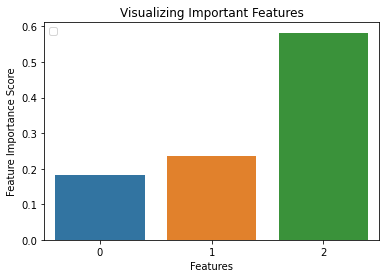

In [96]:
# Creating a bar plot
fig5=sns.barplot(x=feature_imp.index, y=feature_imp)

# Add labels to your graph
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [97]:
fig5.figure.savefig('Images/features.png')

# Decision Tree

In [98]:
rf_data_columns = rf_data[["Borough", "PersonsInjured", "Hour"]] 
rf_data_target = rf_data[["PersonsKilled"]]

In [99]:
# Create and score a decision tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(rf_data_columns, rf_data_target)
clf.score(rf_data_columns, rf_data_target)

0.9987951807228915

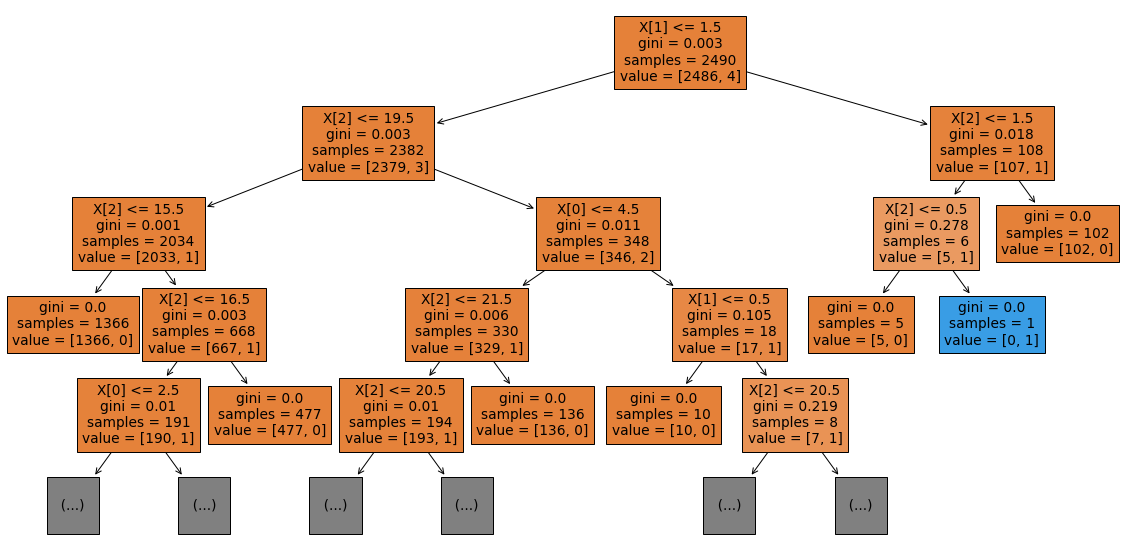

In [100]:
model_all_params=clf

#Prepare a plot figure with set size
fig1=plt.figure(figsize=(20,10))

#Plot the decision tree showing the decisive values and the improvements in Gini impurity along the way
plot_tree(model_all_params, max_depth=4,
         filled=True)

# Display the tree plot figure.
plt.show()

In [101]:
fig1.savefig("Images/decision_tree2.png")


# Decision Tree - Injury

In [102]:
rf2_data = knn_data4

In [103]:
# Create a random forest classifier
rf2 = RandomForestClassifier(n_estimators=200)
#iris.data is specific to iris set
rf2_data_columns = rf2_data[["Borough", "PersonsKilled", "Hour"]] 
rf2_data_target = rf2_data[["PersonsInjured"]]



In [104]:
rf2 = rf2.fit(rf2_data_columns, rf2_data_target)
rf2.score(rf2_data_columns, rf2_data_target)

<ipython-input-104-c46d44de578f>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2 = rf2.fit(rf2_data_columns, rf2_data_target)


0.7815261044176707

In [ ]:
importances2 = rf2.feature_importances_
importances2

In [ ]:
import pandas as pd
feature_imp2 = pd.Series(rf2.feature_importances_).sort_values(ascending=False)
feature_imp2

In [ ]:
# Creating a bar plot
fig7=sns.barplot(x=feature_imp2.index, y=feature_imp2)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
fig7.figure.savefig('Images/features2.png')

In [ ]:
rf2_data_columns = rf2_data[["Borough", "Hour"]] 
rf2_data_target = rf2_data[["PersonsInjured"]]

In [ ]:
# Create and score a decision tree classifier
clf2 = tree.DecisionTreeClassifier()
clf2 = clf.fit(rf2_data_columns, rf2_data_target)
clf2.score(rf2_data_columns, rf2_data_target)

In [ ]:
model_all_params2=clf2

#Prepare a plot figure with set size
fig8=plt.figure(figsize=(20,10))

#Plot the decision tree showing the decisive values and the improvements in Gini impurity along the way
plot_tree(model_all_params2, max_depth=2,
         filled=True)

# Display the tree plot figure.
plt.show()

In [ ]:
fig8.savefig('Images/decision_treeinjured.png')


